# <b>CHAPTER 05. 회귀<b>

## <b>1. 회귀 소개<b>

**회귀란**
- 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
- 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
- 머신러닝의 관점에서: 독립변수는 피처에 해당, 종속변수는 결정 값에 해당
- 머신러닝 회귀 예측의 핵심: 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 **최적의 회귀 계수**를 찾아내는 것

**회귀의 유형**
- 회귀 계수의 선형/비선형 여부
  - 선형 회귀
  - 비선형 회귀
- 독립변수의 개수
  - 단일 회귀
  - 다중 회귀
- 종속변수의 개수

**지도학습의 두 유형: 분류 & 회귀**
- 분류: 예측값이 카테고리와 같은 이산형 클래스 값
- 회귀: 예측값이 연속형 숫자 값

**선형 회귀**
- 여러 가지 회귀 중 가장 많이 사용됨
- 실제값과 예측값의 차이 (오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화
- **규제 (Regularization)** 방법에 따라 다시 별도의 유형으로 나뉨
  - 규제: 일반적인 선형 회귀의 과적합 문제를 해결하기 위해 회귀 계수에 페널티 값을 적용하는 것
- 대표적인 선형 회귀 모델
  - **일반 선형 회귀**: 예측값과 실제값의 **RSS(Residual Sum of Squares)를 최소화**할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델
  - **릿지(Ridge)**: 선형 회귀에 **L2 규제**를 추가한 회귀 모델. L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델
  - **라쏘(Lasso)**: 라쏘 회귀는 선형 회귀에 **L1 규제**를 적용한 방식. L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것. 이때문에 L1 규제를 피처 선택 기능이라고도 부름.
  - **엘라스틱넷(ElasticNet)**: **L2, L1 규제를 결합**한 모델. 주로 피처가 많은 데이터 세트에 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정.
  - **로지스틱 회귀(Logistic Regression)**: 사실은 회귀가 아니라 분류에 사용되는 선형 모델. 매우 강력한 **분류 알고리즘**으로, 일반적으로 이진 분류뿐만 아니라 희소 영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보임.

## <b>2. 단순 선형 회귀를 통한 회귀 이해<b>

- 실제값과 회귀 모델의 차이에 따른 오류값 = 잔차
- 잔차 합이 최소가 되는 모델을 만들어 최적의 회귀 모델을 만들 수 있음
- 오류 합을 계산할 때는 절댓값을 취해서 더하거나 (Mean Absolute Error), 오류값의 제곱을 구해서 더하는 방식 (Residual Sum of Square)을 취함
- 일반적으로 미분 등의 계산을 편리하게 하기 위해서 RSS 방식으로 오류 합을 구함
- RSS를 최소로 하는 회귀 계수를 학습을 통해 찾는 것이 머신러닝 기반 회귀의 핵심 사항
- RSS는 회귀식의 독립변수 X, 종속변수 Y가 아닌 W 변수 (회귀 계수)가 중심 변수임
- 회귀에서 RSS는 비용 (Cost) 이며, w 변수(회귀 계수)로 구성되는 RSS를 비용 함수라고 함
- 머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값(즉, 오류값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류값을 구함
- 비용 함수를 손실 함수 (loss function)라고도 함

## <b>3. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개<b>

**비용 함수가 최소가 되는 W 파라미터를 어떻게 구할 수 있을까?**   



**경사 하강법**
- 고차원 방정식에 대한 문제를 해결해 주면서 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공
- '데이터를 기반으로 알고리즘이 스스로 학습한다'는 머신러닝의 개념을 가능하게 만들어준 핵심 기법의 하나
- '점진적으로' 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류값이 최소가 되는 W 파라미터를 구하는 방식
- 반복적으로 비용 함수의 반환값(예측값과 실제값의 차이)이 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정
- ex. 최초 오류값이 100이었다면 두 번째 오류값은 90, 세 번째는 80 ...
- 오류값이 더 이상 작아지지 않으면 그 오류값을 최소 비용으로 판단하고 그때의 W값을 최적 파라미터로 반환
- "어떻게 하면 오류가 작아지는 방향으로 W값을 보정할 수 있을까?"

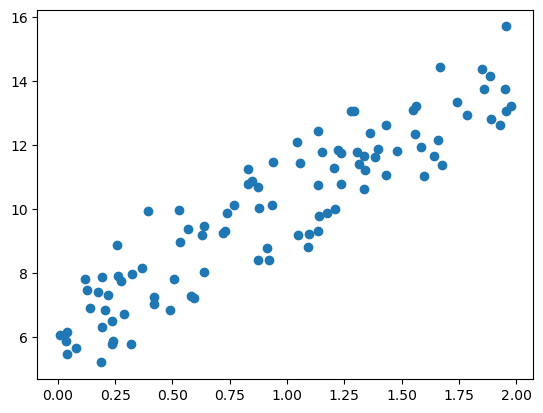

In [31]:
# 딘순 선형 회귀로 예측할 만한 데이터 세트 만들기

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X+6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100,1)
y = 6 + 4*X + np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [32]:
# 위의 데이터가 y = 4X + 6을 중심으로 무작위로 퍼져 있음

# 비용 함수 정의
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [33]:
# gradient_descent() 함수 생성하여 경사 하강법 구현

# w1, w0을 모두 0으로 초기화한 뒤 iters 개수만큼 반복하면서 w1과 w0을 업데이트

# w1과 w0을 업데이트할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [34]:
# get_weight_updates()을 경사 하강 방식으로 반복적으로 수행하여 w1과 w0를 업데이트하는 함수인 gradient_descent_steps() 함수 생성

# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이터 적용
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [35]:
# 이제 gradient_descent_steps()를 호출해 w1과 w0 구하기
# 최종적으로 예측값과 실제값의 RSS 차이를 계산하는 get_cost() 함수를 생성하고 이를 이용해 경사 하강법의 예측 오류 계산

def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


In [36]:
# 실제 선형식인 y = 4X + 6과 유사하게 w1은 4.022, w0는 6.162가 나옴
# 예측 오류 비용은 약 0.9935

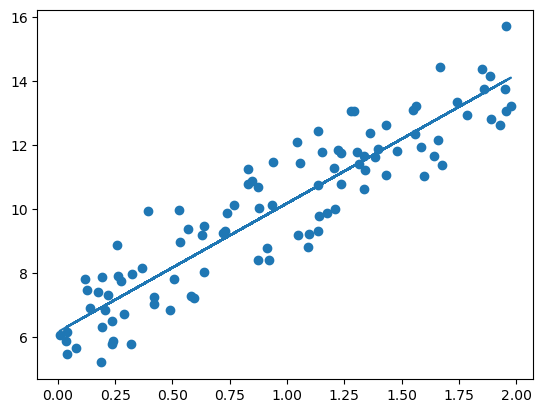

In [37]:
# 앞에서 구한 y_pred에 기반해 회귀선 그리기

plt.scatter(X,y)
plt.plot(X,y_pred)

- 경사 하강법을 이용해 회귀선이 잘 만들어졌음을 알 수 있음
- 일반적으로 **경사 하강법**은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 **수행시간이 매우 오래 소요**된다는 단점이 있음
- 따라서 실전에서는 대부분 확률적 경사 하강법 (Stochastic Gradient Descent)를 이용
- **확률적 경사 하강법**
  - 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 **일부 데이터만 이용**해 w가 업데이트되는 값을 계산
  - 따라서 경사 하강법에 비해서 빠른 속도 보장
  - 따라서 대용량의 데이터의 경우 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수 도출

In [38]:
# (미니 배치) 확률적 경사 하강법을 stochastic_gradient_descent_steps() 함수로 구현
# gradient_descent_steps()와 크게 다르지 않으나, 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 이를 기반으로 w1_update, w0_update를 계산하는 부분만 차이가 있음

def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0

    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하기 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터를 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [39]:
# 이렇게 만들어진 stochastic_gradient_descent_steps() 이용해 w1, w0 및 예측 오류 비용 계산

w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0,0], 3), "w0:", round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Tool Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Tool Cost: 0.9937


- (미니 배치) 확률적 경사 하강법으로 구한 w0, w1 결과와 경사 하강법으로 구한 w0, w1 사이에 큰 차이가 없음
- 이로써 큰 데이터를 처리할 경우에는 시간 단축을 위해 확률적 경사 하강법을 이용할 수 있음을 확인

- 피처가 많아지면, 즉 회귀 계수가 많아지면 선형대수를 이용하여 예측값 도출

## <b>4. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측<b>

### <b>LinearRegression 클래스 - Ordinary Least Squares<b>

**LinearRegression 클래스**
- 예측값과 실제값의 **RSS**(Residual Sum of Squares)를 최소화해 **OLS**(Ordinary Least Squares) 추정 방식으로 구현한 클래스
- **fit() 메서드**로 X, y 배열을 입력 받으면 회귀 계수인 W을 **coef_ 속성**에 저장

**Ordinary Least Squares** 기반의 회귀 계수 계산은 **입력 피처의 독립성**에 많은 영향을 받음
- 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감 => **다중공선성** 문제 (Multicollinearity)
- 일반적으로 상관관계가 높은 피처가 많은 경우 **독립적인 중요한 피처만 남기고 제거**하거나 **규제** 적용
- 매우 많은 피처가 다중공선성 문제를 가지고 있다면 **PCA**를 통해 **차원 축소**를 수행하는 것도 고려

### <b>회귀 평가 지표<b>

회귀의 평가를 위한 지표는 **실제값과 회귀 예측값의 차이값**을 기반으로 함
* 오류의 합은 0이므로 지표로 이용이 불가능 => 오류의 절댓값, 평균, 제곱 등 활용


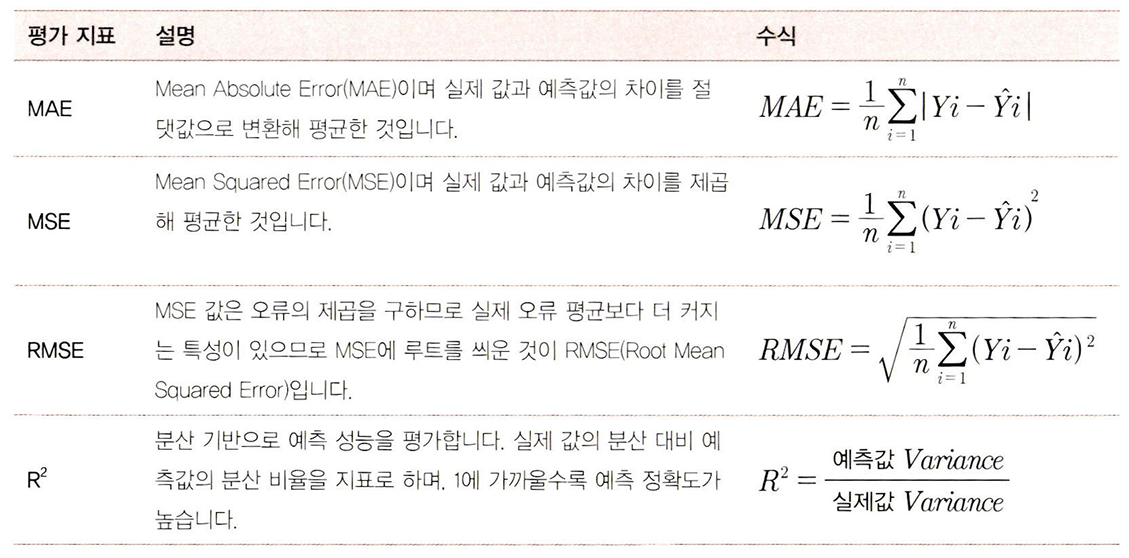

다음은 각 평가 방법에 대한 사이킷런의 API 및 cross_val_score나 GridSearchCV에서 평가 시 사용되는 scoring 파라미터의 적용 값

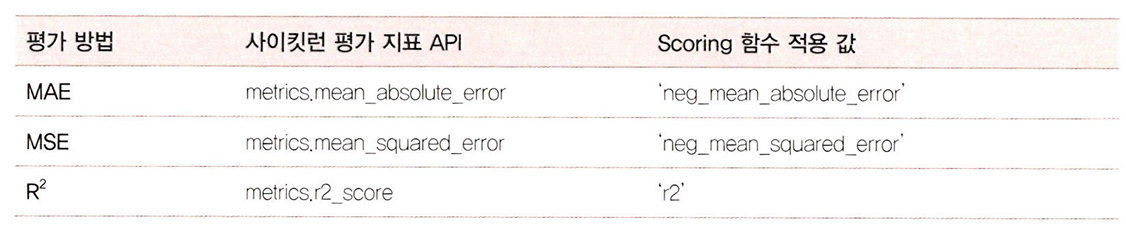

corss_val_score, GridSearchCV와 같은 **Scoring 함수에 회귀 평가 지표를 적용할 때 유의할 점**
- **'neg_'** 접두어를 붙여 **음수 값으로 변환**한 뒤 이용해야 함
- ex. MAE의 파라미터 값: 'neg_mean_absolute_error'  
  => 여기서 'neg_'는 negative 값을 가진다는 의미  
  => 그런데 MAE는 절댓값의 합이기 때문에 음수가 될 수 없음  
  => 그럼에도 불구하고 neg_를 이용해 음수값을 반환하는 이유는 사이킷런의 Scoring 함수가 score 값이 클수록 좋은 평가 결과로 자동 평가하기 때문  
  => 그런데 실제값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우, 값이 커지면 오히려 나쁜 모델이라는 의미  
  => 따라서 -1을 원래의 평가 지표에 곱해서 음수를 만들어 Scoring 함수에 반영할 수 있게 보정  

### <b>LinearRegression을 이용해 보스턴 주택 가격 회귀 구현<b>

보스턴 주택 가격 데이터셋의 피처

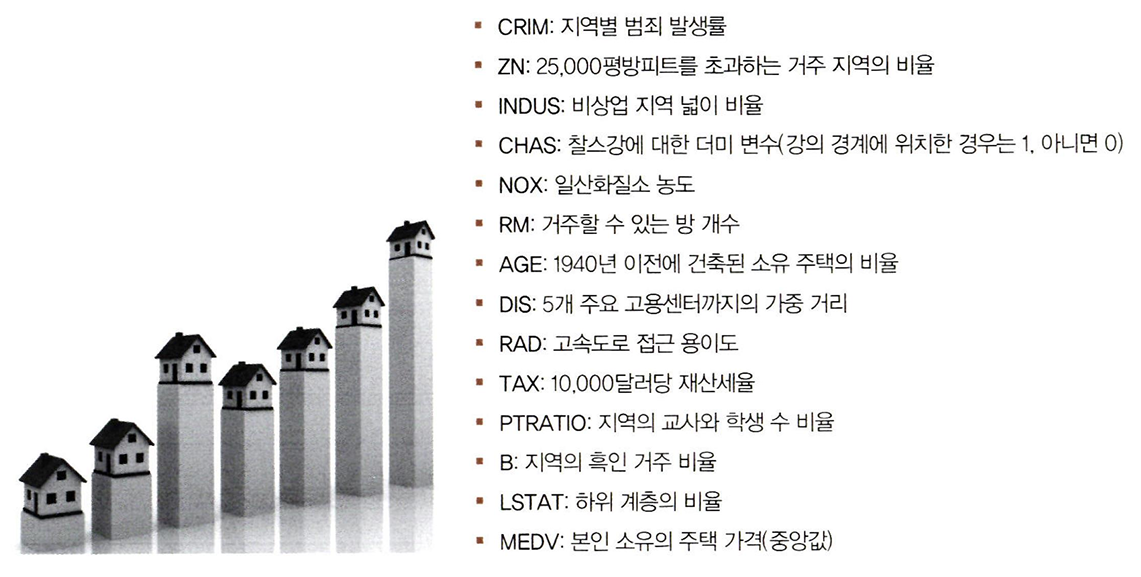

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

# feature name이 없으므로 따로 지정해줘야 함.

feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX' ,'PTRATIO', 'B' ,'LSTAT', 'PRICE']

bostonDF = pd.DataFrame(boston, columns=feature_names)

print('Boston 데이터 세트 크기:', bostonDF.shape)

bostonDF.head() 

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


다음으로 각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화해서 알아보자.
- RM, ZN, INDUS, NOX, AGE, PTRATIO, LSTAT, RAD의 총 8개 칼럼 값이 증가할수록 PRICE 값이 어떻게 변하는지 확인

**Seaborn의 regplot()**: X, Y 축 값의 산점도와 함께 회귀 직선을 그려줌  
**matplotlib.subplots()**: 각 ax마다 칼럼과 PRICE의 관계를 표현 (여러 개의 그래프를 한번에 표현하기 위해 자주 사용됨)

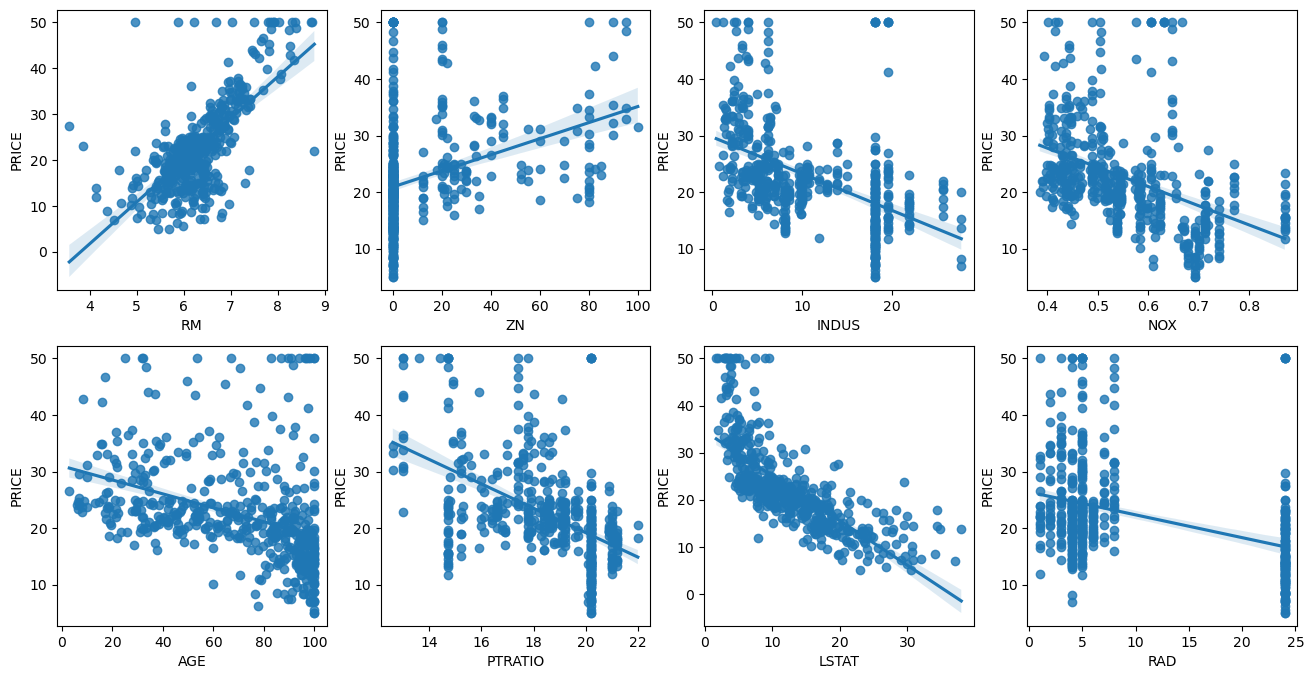

In [41]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

- 다른 칼럼에 비해 RM과 LSTAT가 PRICE에 두드러지게 영향을 미침  
- RM (방 개수): 양방향의 선형성이 가장 큼
- LSTAT (하위 계층의 비율): 음방향의 선형성이 가장 큼

이제 LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델을 만들자.
- train_test_split()을 이용해 학습과 테스트 데이터 세트를 분리하여 학습과 예측 수행
- metrics 모듈의 mean_squared_error()와 r2_score() API를 이용해 MSE와 R2 Score 측정

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3F}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


LinearRegression으로 생성한 주택가격 모델의 intercept와 coefficients 확인
- 절편은 LinearRegression 객체의 **intercept_** 속성에
- 회귀 계수는 **coef_** 속성에 값이 저장되어 있음

In [43]:
print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_, 1))

절편 값: 40.99559517216419
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


피처별 회귀 계수 값으로 다시 매핑하고 높은 값 순으로 출력: 판다스 Series의 sort_values() 함수 이용

In [44]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series 생성. 인덱스 칼럼명에 유의.
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

=> RM이 양의 값으로 회귀 계수가 가장 크며, NOX 피처의 회귀 계수 -값이 너무 커 보임  
=> 최적화 수행하면서 피처 coefficients의 변화도 같이 살펴보자

In [46]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구하기
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829


## <b>5. 다항 회귀와 과(대)적합/과소적합 이해<b>

### <b>다항 회귀 이해<b>

**다항 회귀, Polynomial 회귀**
- 다항 회귀는 **선형 회귀**
- 회귀에서 선형/비선형을 나누는 기준은 **회귀 계수가 선형/비선형인지**에 따른 것이지 독립변수의 선형/비선형 여부와는 무관
- 사이킷런은 다항 회귀를 위한 클래스를 제공하지 않음
- 대신 다항 회귀 역시 선형 회귀이기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현
- **PolynomialFeatures** 클래스를 통해 피처를 Polynomial 피처로 변환
- 다른 전처리 변환 클래스와 마찬가지로 Polynomial 클래스는 **fit(), tranform()** 메서드를 이용해 변환 작업 수행

In [48]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환된 단항식 생성, [[0,1], [2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


=> 이렇게 변환된 Polynomial 피처에 선형 회귀를 적용해 다항 회귀 구현

이번엔 3차 다항 계수를 이용해 3차 다항 회귀 함수식을 PolynomialFeatures와 LinearRegression 클래스를 이용해 유도

In [50]:
# 3차 다항 회귀 함수를 임의로 설정
def polynomial_func(X):
    y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값:\n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [51]:
# 1차 단항식 계수를 3차 다항식 계수로 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_,2))
print('Polynomial 회귀 Shape:', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


- 일차 단항식 계수 피처는 2개였지만 3차 다항식 Polynomial 변환 이후에는 다항식 계수 피처가 10개로 늘어남
- 이 피처 데이터 세트에 LinearRegression을 통해 3차 다항 회귀 형태의 다항 회귀를 적용하면 회귀 계수가 10개로 늘어남
- 사이킷런은 PolynomialFeatures로 피처를 변환한 후 LinearRegression 클래스로 다항 회귀 구현

In [54]:
# 사이킷런의 Pipeline 객체를 이용해 한 번에 다항 회귀 구현하는 방법

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression 변환
model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### <b>다항 회귀를 이용한 과소적합 및 과적합 이해<b>

- 다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링 가능
- 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링 가능
- BUT 다항 회귀의 차수(degree)를 높일수록 학습데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어짐
- 즉, 차수가 높아질수록 과적합 문제 발생

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5*np.pi*X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.40772896250986845 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.043208749872317626 입니다.

Degree 15 회귀 계수는 [-2.98292000e+03  1.03899180e+05 -1.87415809e+06  2.03715961e+07
 -1.44873157e+08  7.09315008e+08 -2.47065753e+09  6.24561150e+09
 -1.15676562e+10  1.56895047e+10 -1.54006170e+10  1.06457389e+10
 -4.91378211e+09  1.35919860e+09 -1.70381087e+08] 입니다.
Degree 15 MSE는 182493841.77304456 입니다.


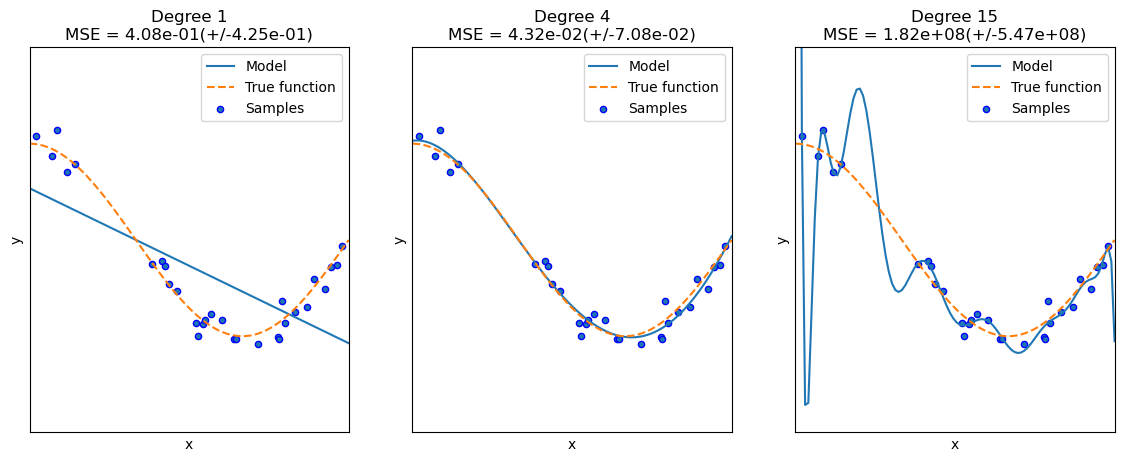

In [60]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수(degree)를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)

    # 교차 검증으로 다항 회귀를 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring = "neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0,1,100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label="Model")
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label = "True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/-{:.2e})".format(degrees[i],-scores.mean(), scores.std()))

- 실선으로 표현된 예측 곡선은 다항 회귀 예측 곡선
- 점선으로 표현된 곡선은 실제 데이터 세트 X, Y의 코사인 곡선
- 학습 데이터는 0부터 1까지의 30개의 임의의 X값과 그에 따른 코사인 Y값에 잡음을 변동 값으로 추가해 구성했으며,
- MSE(mean squared error) 평가는 학습 데이터를 10개의 교차 검증 세트로 나누어 측정해서 평균한 것

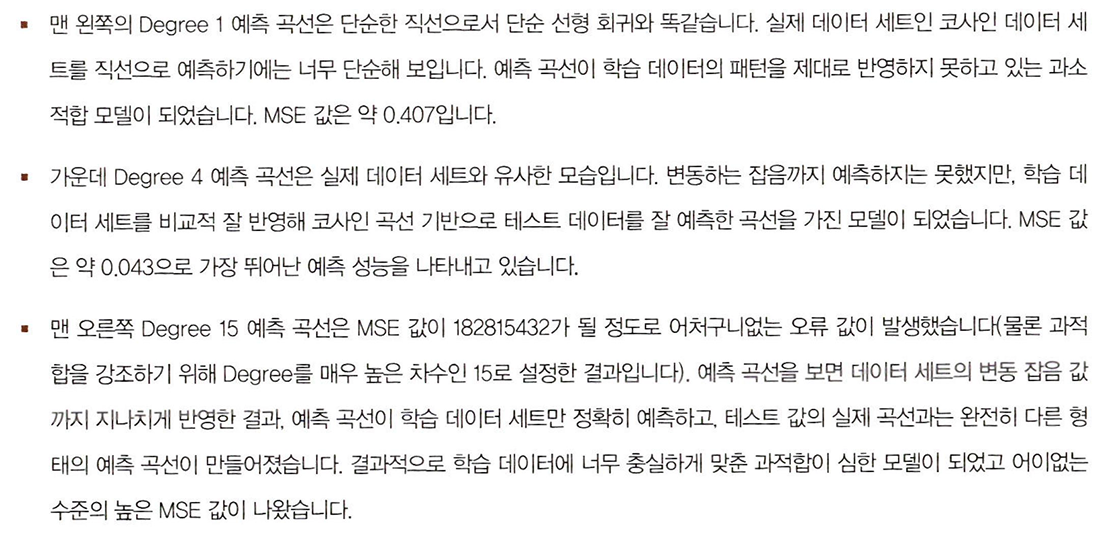

* 결국, 좋은 예측 모델은 Degree 1과 같이 학습 데이터의 패턴을 지나치게 단순화한 **과소적합 모델**도 아니고  
* Degree 15와 같이 모든 학습 데이터의 패턴을 하나하나 감안한 지나치게 복잡한 **과적합 모델**도 아닌,  
* 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 **균형 잡힌 모델**

### <b>편향-분산 트레이드오프(Bias-Variance Trade off)<b>

- 편향-분산 트레이드오프는 머신러닝이 극복해야할 가장 중요한 이슈 중 하나
- 앞의 Degree 1과 같은 모델은 매우 단순화된 모델로서 지나치게 한 방향성으로 치우친 경향이 있음: **고편향성** (**High Bias**)을 가짐
- 반대로 Degree 15와 같은 모델은 학습 데이터 하나하나의 특성을 반영하면서 매우 복잡한 모델이 되었고 지나치게 높은 변동성을 가짐: **고분산성** (**High Variance**)을 가짐

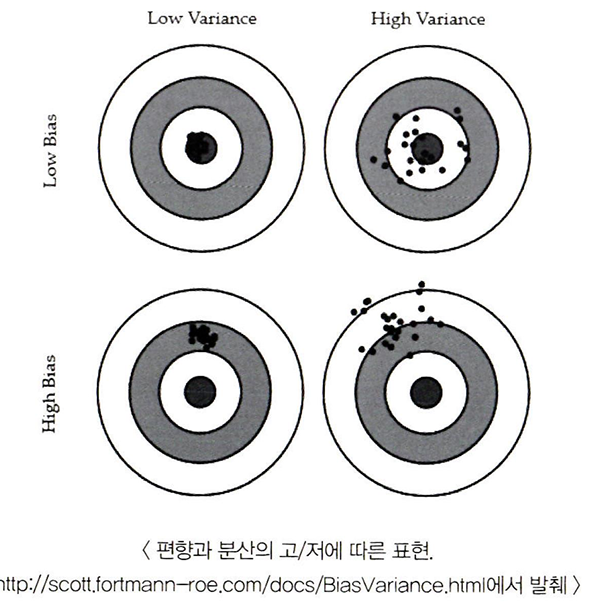

- 일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있음
- 높은 평향/낮은 분산에서 과소적합이 되기 쉬우며,
- 낮은 편향/높은 분산에서 과적합되기 쉬움
- 편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법

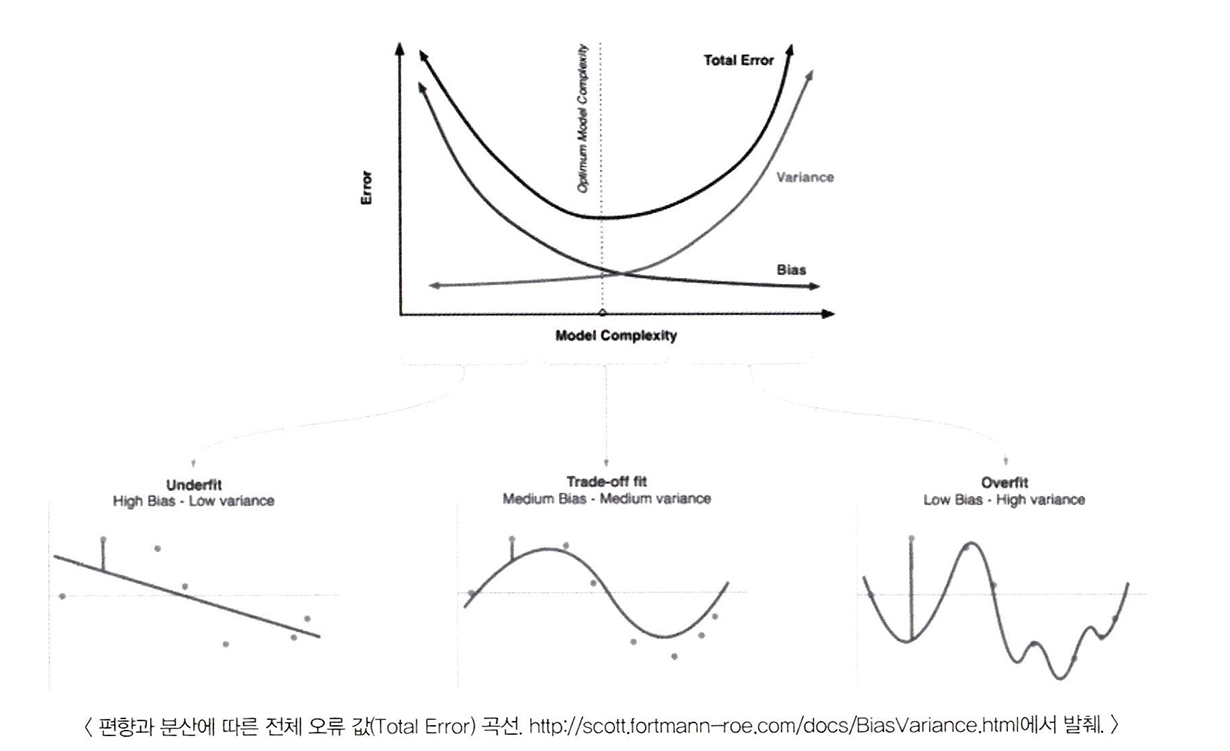